In [26]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [27]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [28]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [29]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [33]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [34]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [35]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [36]:
# X_train = trainX.reshape(-1, 28,28,1)
# X_test = testX.reshape(-1, 28,28,1)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255
# y_train = np_utils.to_categorical(trainY, 3)
# y_test = np_utils.to_categorical(testY, 3)

In [37]:
# y_train.shape

In [38]:
#Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten(input_shape=(128*128*3,)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(3,activation='softmax'))

In [39]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 3,145,987
Trainable params: 3,145,987
Non-trainable params: 0
_________________________________________________________________


In [40]:

model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(trainX,trainY,epochs=50,batch_size=100,validation_data=(testX,testY))

Epoch 1/50
8/8 [==============================] - 1s 82ms/step - loss: 12.8633 - acc: 0.3502 - val_loss: 3.7846 - val_acc: 0.5063
Epoch 2/50
8/8 [==============================] - 0s 54ms/step - loss: 3.2643 - acc: 0.4909 - val_loss: 2.5915 - val_acc: 0.5949
Epoch 3/50
8/8 [==============================] - 0s 52ms/step - loss: 3.0907 - acc: 0.5485 - val_loss: 1.7889 - val_acc: 0.6371
Epoch 4/50
8/8 [==============================] - 0s 47ms/step - loss: 1.6921 - acc: 0.5935 - val_loss: 1.7692 - val_acc: 0.6160
Epoch 5/50
8/8 [==============================] - 0s 48ms/step - loss: 1.3372 - acc: 0.6498 - val_loss: 2.4687 - val_acc: 0.5232
Epoch 6/50
8/8 [==============================] - 0s 47ms/step - loss: 1.6699 - acc: 0.5668 - val_loss: 1.7135 - val_acc: 0.5865
Epoch 7/50
8/8 [==============================] - 0s 48ms/step - loss: 1.5458 - acc: 0.6217 - val_loss: 3.4888 - val_acc: 0.6498
Epoch 8/50
8/8 [==============================] - 0s 49ms/step - loss: 2.2502 - acc: 0.5949 - va

In [41]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 3,145,987
Trainable params: 3,145,987
Non-trainable params: 0
_________________________________________________________________


In [42]:
model1.evaluate(testX,testY)

8/8 [==============================] - 0s 8ms/step - loss: 1.0610 - acc: 0.7046


[1.0609939098358154, 0.7046413421630859]

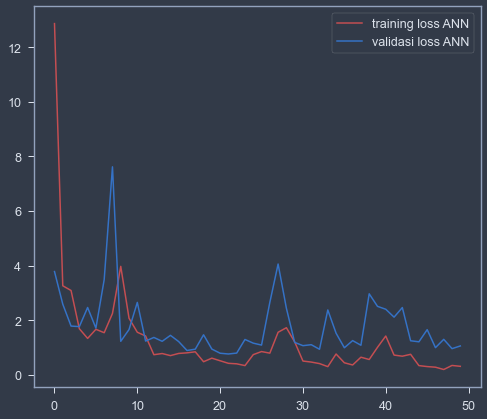

In [43]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

epochs = range(50)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [44]:
import numpy as np

pred = model1.predict(testX)
print('label actual:',np.argmax(testY[236]))
print('label prediction:',np.argmax(pred[236]))

label actual: 2
label prediction: 2


In [46]:
testX.shape

(237, 128, 128, 3)

In [47]:
np.argmax(pred, axis=1)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2,
       2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [48]:
np.argmax(testY, axis=1)

array([1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2,
       2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2], dtype=int64)

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(3,activation='softmax'))

In [50]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 98307     
Total params: 103,395
Trainable params: 103,395
Non-trainable params: 0
________________________________________________

In [51]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(trainX,trainY,epochs=50,batch_size=100,validation_data=(testX,testY))

Epoch 1/50
8/8 [==============================] - 7s 844ms/step - loss: 1.2620 - acc: 0.3446 - val_loss: 0.9188 - val_acc: 0.6709
Epoch 2/50
8/8 [==============================] - 6s 793ms/step - loss: 0.7667 - acc: 0.7229 - val_loss: 0.6050 - val_acc: 0.8186
Epoch 3/50
8/8 [==============================] - 6s 791ms/step - loss: 0.5075 - acc: 0.8326 - val_loss: 0.4587 - val_acc: 0.8017
Epoch 4/50
8/8 [==============================] - 6s 787ms/step - loss: 0.4543 - acc: 0.8087 - val_loss: 0.4355 - val_acc: 0.8397
Epoch 5/50
8/8 [==============================] - 6s 788ms/step - loss: 0.3881 - acc: 0.8298 - val_loss: 0.3514 - val_acc: 0.8945
Epoch 6/50
8/8 [==============================] - 6s 779ms/step - loss: 0.3492 - acc: 0.8833 - val_loss: 0.5743 - val_acc: 0.7975
Epoch 7/50
8/8 [==============================] - 6s 782ms/step - loss: 0.3075 - acc: 0.9058 - val_loss: 0.3076 - val_acc: 0.8987
Epoch 8/50
8/8 [==============================] - 6s 782ms/step - loss: 0.2546 - acc: 0.91

In [52]:
model2.evaluate(testX,testY)

8/8 [==============================] - 1s 80ms/step - loss: 0.3055 - acc: 0.9072


[0.3054967522621155, 0.9071729779243469]

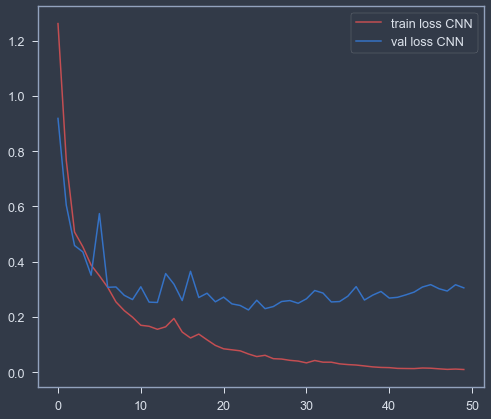

In [53]:
import matplotlib.pyplot as plt

epochs = range(50)

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r',label='train loss CNN')
plt.plot(epochs,val_loss2,'b',label='val loss CNN')
plt.legend()

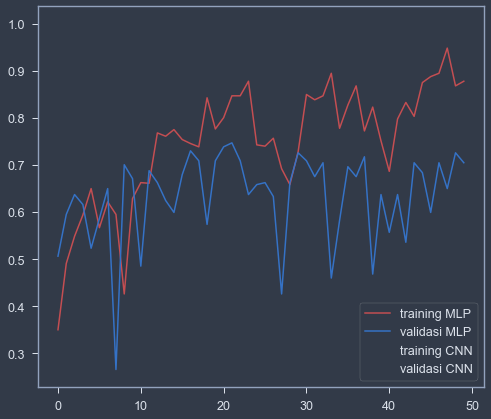

In [54]:
import matplotlib.pyplot as plt

epochs = range(50)

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs,acc1,'r',label='training MLP')
plt.plot(epochs,val_acc1,'b',label='validasi MLP')

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

plt.plot(epochs,acc2,'r+',label='training CNN')
plt.plot(epochs,val_acc2,'b+',label='validasi CNN')
plt.legend()

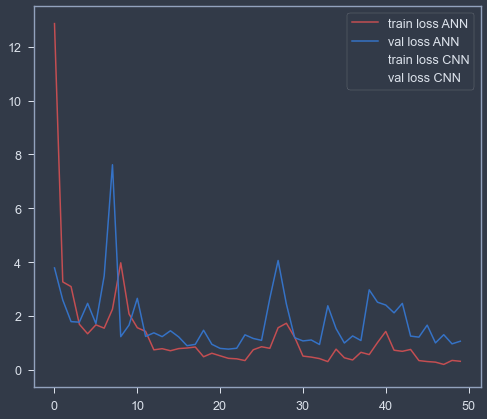

In [55]:
import matplotlib.pyplot as plt

epochs = range(50)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [56]:
import numpy as np

pred = model2.predict(testX)
print('label actual:',np.argmax(testY[200]))
print('label prediction:',np.argmax(pred[200]))

label actual: 2
label prediction: 2
